In [1]:
library(eurostat)

# Úlohy - kontingenční tabulky

Jako příklad si vezmeme data z Eurostatu s tímto názvem:

**Students enrolled in tertiary education by education level, programme orientation, sex and NUTS2 regions**

Identifikátor datasetu je *educ_uoe_enrt06*. Data jsou dostupná rovněž na https://ec.europa.eu/eurostat/databrowser/view/educ_uoe_enrt06/default/table?lang=EN

## Úkol 1

Stáhněte výše uvedená data a připravte je k analýze.

Zajímat nás budou data:
- NUTS CZ (celá ČR)
- nejnovější rok (2020-01-01)
- isced11 kódy
  - ED6 - Bachelor's or equivalent level
  - ED7 - Master's or equivalent level
  - ED8 - Doctoral or equivalent level
- pohlaví M/F

Vše ostatní vč. přebytečných hodnot (levelů) faktorových proměnných zahodíme (`droplevels()`). Výsledkem tedy nechť je tabulka obsahující pouze sloupce "*isced11*", "*sex*", "*values*".

*Pozn.: Pokud bychom si chtěli data prohlédnout detailně, můžeme si vyžádat "olabelování":*

```> label_eurostat(cz_data, fix_duplicated=T)```


In [2]:
data <- get_eurostat("educ_uoe_enrt06")

Table educ_uoe_enrt06 cached at /tmp/Rtmpzb6VXK/eurostat/educ_uoe_enrt06_date_code_FF.rds



In [3]:
cz_data <- data[data$geo=='CZ',]
cz_data <- cz_data[cz_data$time=='2020-01-01',]
cz_data$sex <- factor(cz_data$sex)
cz_data$isced11 <- factor(cz_data$isced11)
cz_data <- cz_data[cz_data$isced11 %in% c('ED6', 'ED7', 'ED8'),]
cz_data <- cz_data[cz_data$sex %in% c('F', 'M'),]
cz_data <- droplevels(cz_data)
cz_data$unit = NULL
cz_data$geo = NULL
cz_data$time = NULL

In [4]:
cz_data

isced11,sex,values
<fct>,<fct>,<dbl>
ED6,F,107858
ED6,M,82815
ED7,F,63597
ED7,M,42237
ED8,F,9420
ED8,M,11741


### Úkol 2

Nyní vytvoříme kontingenční tabulku. Jelikož má vzniknout z výše připravené tabulky, bude potřeba ji vytvořit pomocí vhodné funkce. Tou je `xtabs()`. Současně se poprvé setkáme s argumentem `formula`, který říká, jakým způsobem jsou zkoumaná data vysvětlována.

V našem případě má hodnoty `values` vysvětlovat kombinace `sex` - `isced11`. Použijeme tedy `formula = values ~ sex + isced11`. Do vzniklé tabulky doplňte marginální součty pomocí `addmargins()`.

In [5]:
ct <- xtabs(formula=values ~ sex + isced11, data=cz_data)
ct

   isced11
sex    ED6    ED7    ED8
  F 107858  63597   9420
  M  82815  42237  11741

In [6]:
addmargins(ct)

,ED6,ED7,ED8,Sum
F,107858,63597,9420,180875
M,82815,42237,11741,136793
Sum,190673,105834,21161,317668


### Úkol 3

Prozkoumejte pravděpodobnosti jednotlivých buněk tabulky. Doplňte rovněž marginální pravděpodobnosti. Nápověda: `prop.table()`, `addmargins()`.

In [7]:
addmargins(prop.table(ct))

,ED6,ED7,ED8,Sum
F,0.3395306,0.2001996,0.02965360,0.5693838
M,0.2606967,0.1329596,0.03695997,0.4306162
Sum,0.6002273,0.3331591,0.06661357,1.0000000


### Úkol 4

Použijte `mosaicplot()` a interpretujte obrázek v duchu výše uvedených výsledků.

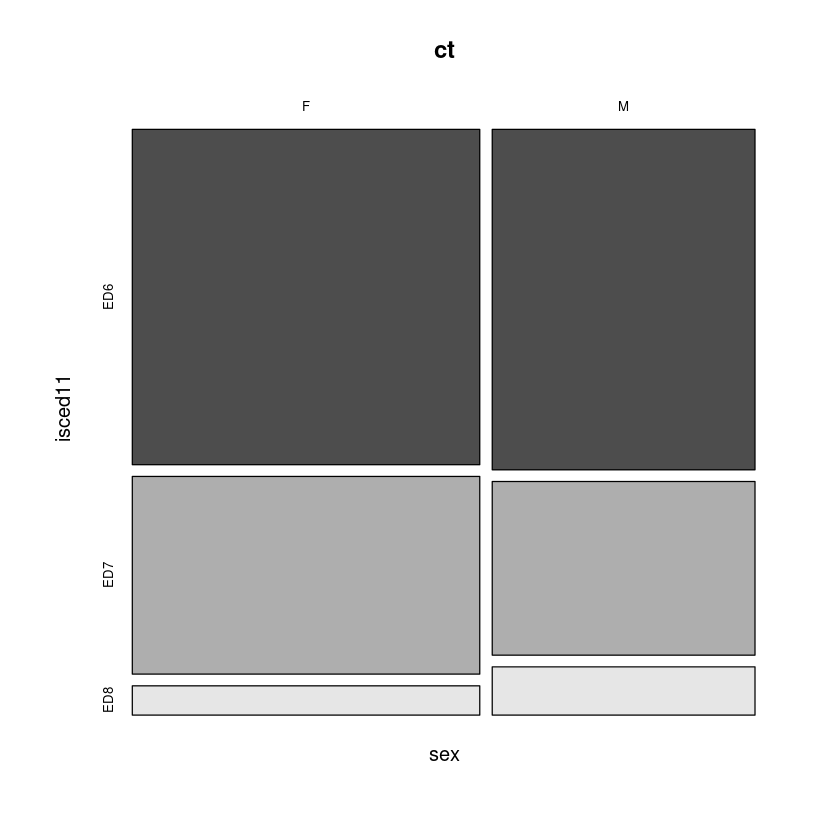

In [8]:
mosaicplot(ct, color=T)

### Úkol 5

Proveďte $\chi^2$ test nezávislosti mezi znaky "pohlaví" a "počet studentů". Zapište hypotézy a test vyhodnoťte. Zjistěte očekávané hodnoty počtů za podmínky platnosti nulové hypotézy a porovnejte je s hodnotami pozorovanými.

In [9]:
pears <- chisq.test(ct)
pears


	Pearson's Chi-squared test

data:  ct
X-squared = 1771.7, df = 2, p-value < 2.2e-16


In [10]:
addmargins(pears$expected)

,ED6,ED7,ED8,Sum
F,108566.11,60260.16,12048.73,180875
M,82106.89,45573.84,9112.27,136793
Sum,190673.00,105834.00,21161.00,317668


In [11]:
addmargins(pears$expected - pears$observed)

,ED6,ED7,ED8,Sum
F,708.1095,-3336.839,2628.73,-1.818989e-12
M,-708.1095,3336.839,-2628.73,1.818989e-12
Sum,0.0000,0.000,0.00,0.000000e+00


### Úkol 6

Pouze cvičně zkuste spočíst Cramérovo V. Byť to v dané aplikaci není užitečné, interpretujte hodnotu a vysvětlete, za jakých podmínek by byla 1. Použijte např. `CramerV()` z balíčku `DescTools`.

In [12]:
library(DescTools)

In [13]:
CramerV(ct)

[1] 0.07468032

In [14]:
ct[1,3] <- 0
ct[2,1] <- 0
ct[2,2] <- 0
ct

   isced11
sex    ED6    ED7    ED8
  F 107858  63597      0
  M      0      0  11741

In [15]:
CramerV(ct)

[1] 1